<a href="https://colab.research.google.com/github/Harshbhatt2409/Iris-Dataset-Visualization/blob/main/IRIS_dataset_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle d download arshid/iris-flower-dataset

  0% 0.00/0.99k [00:00<?, ?B/s]
100% 0.99k/0.99k [00:00<00:00, 594kB/s]


In [ ]:
!unzip iris-flower-dataset.zip

Archive:  iris-flower-dataset.zip
  inflating: IRIS.csv                


In [ ]:
# Install pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 6.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=e883facda2891c730e44b3ed1bacdb41912c7407df3e79a88bce332c4e652d0c
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark


In [ ]:
# Import SparkSession
from pyspark.sql import SparkSession
# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# Check Spark Session Information
spark

In [ ]:
import numpy as np
import pandas as pd
import pyspark
import os
import urllib
import sys

In [ ]:
data = pd.read_csv("/content/IRIS.csv")

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data["species"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [ ]:
import matplotlib.pyplot as plt

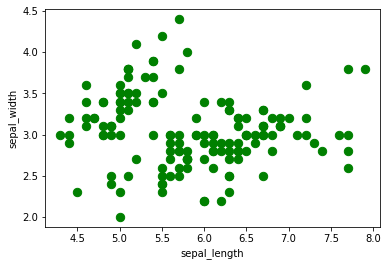

In [ ]:
data.plot(kind="scatter", x="sepal_length", y="sepal_width",color="green",s=70 )
plt.show()

In [ ]:
import seaborn as sns

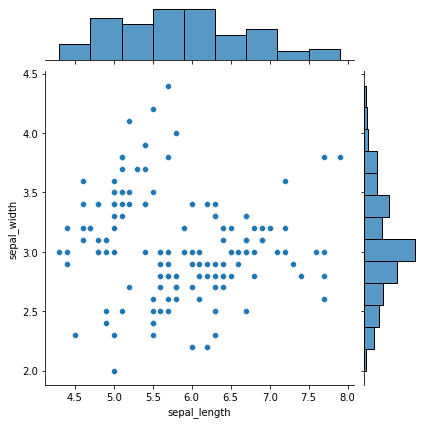

In [ ]:
sns.jointplot(data=data, x="sepal_length", y="sepal_width")

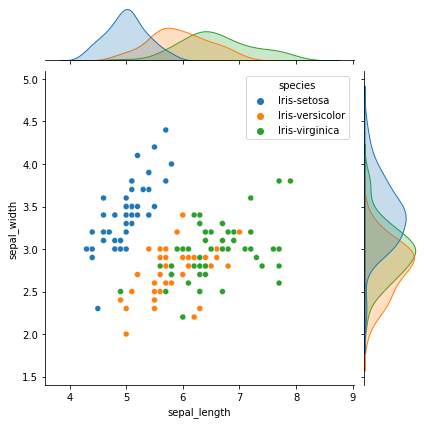

In [ ]:
sns.jointplot(data=data, x="sepal_length", y="sepal_width", hue="species")

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


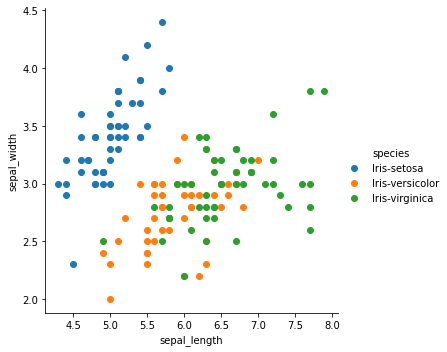

In [ ]:
sns.FacetGrid(data, hue="species", size = 5) \
    .map(plt.scatter, "sepal_length", "sepal_width") \
    .add_legend()
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


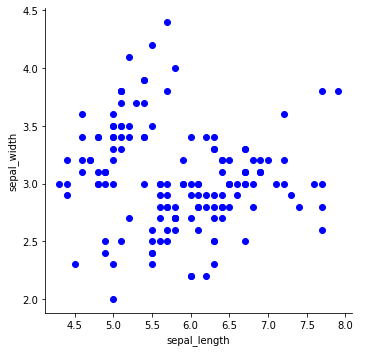

In [ ]:
KS = {'color': ['blue','red','yellow']}
sns.FacetGrid(data, hue_kws=KS, size = 5) \
    .map(plt.scatter, "sepal_length", "sepal_width") \
    .add_legend()
plt.show()

<AxesSubplot:xlabel='species', ylabel='petal_length'>

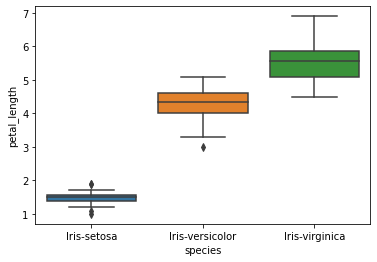

In [ ]:
sns.boxplot(data=data, x="species", y="petal_length")

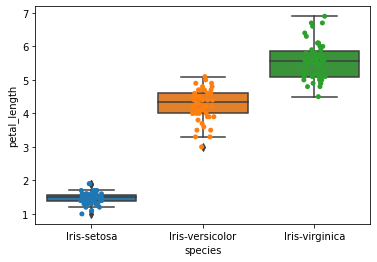

In [ ]:
ax = sns.boxplot(x="species", y="petal_length", data=data)
ax = sns.stripplot(x="species", y="petal_length", data=data, jitter = True, edgecolor = "gray")
plt.show()

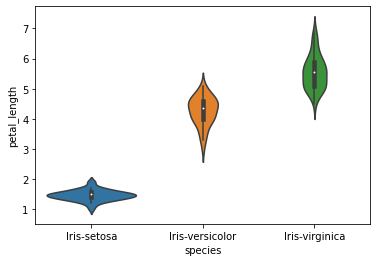

In [ ]:
sns.violinplot(x="species", y="petal_length", data=data, size = 6)
plt.show()

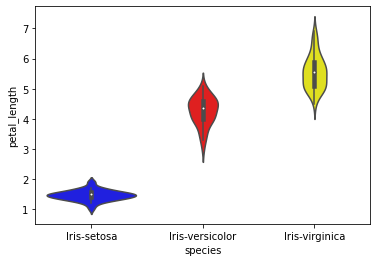

In [ ]:
sns.violinplot(x="species", y="petal_length",  palette={"blue","red","yellow"}, data=data, size=6)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


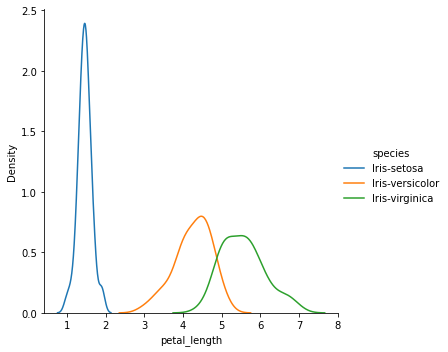

In [ ]:
from seaborn.distributions import kdeplot
sns.FacetGrid(data, hue="species", size=5) \
   .map(sns.kdeplot,"petal_length") \
   .add_legend() 

plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


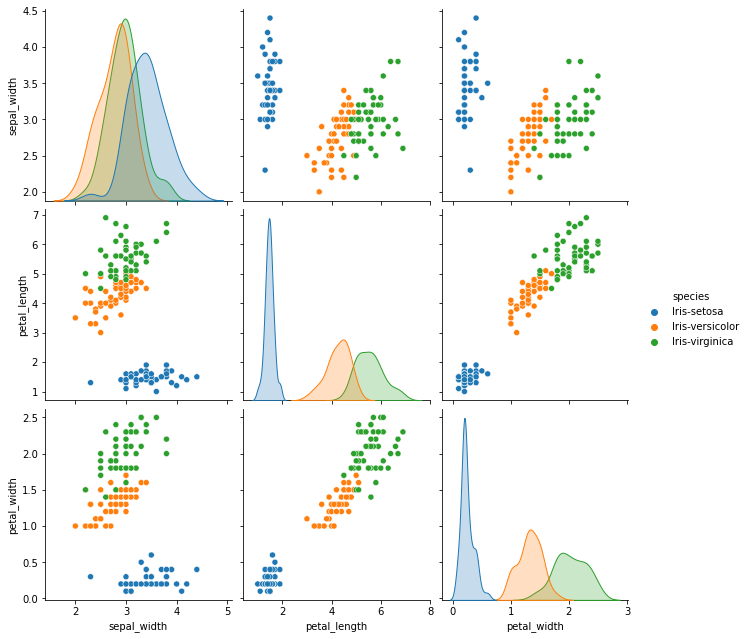

In [ ]:
sns.pairplot(data.drop("sepal_length", axis=1), hue="species", size=3)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


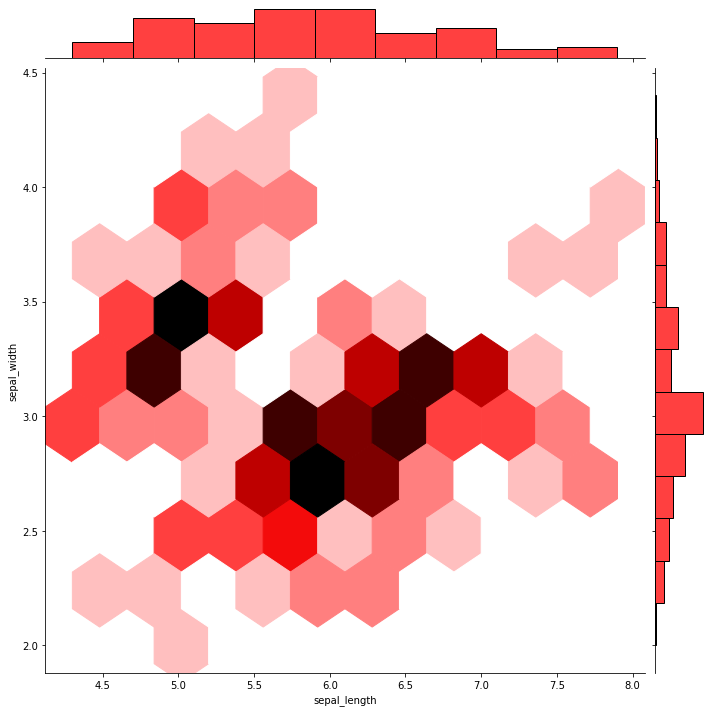

In [ ]:
sns.jointplot(x = "sepal_length", y= "sepal_width", data=data, size=10, ratio = 10, kind='hex', color = 'red')
plt.show()

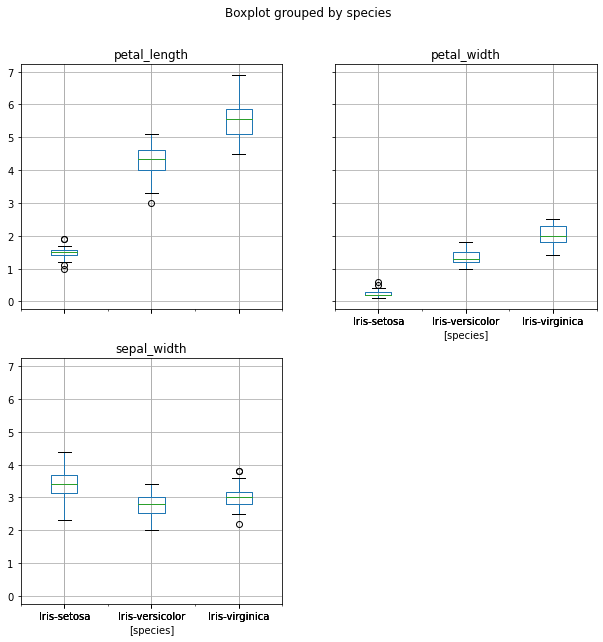

In [ ]:
data.drop("sepal_length", axis=1).boxplot(by="species", figsize=(10, 10))
plt.show()

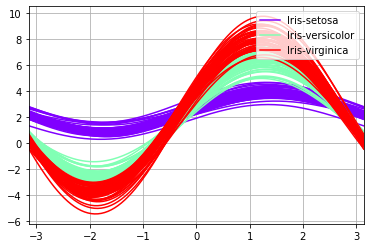

In [ ]:
from pandas.plotting import andrews_curves
andrews_curves(data.drop("sepal_length", axis=1), "species",colormap='rainbow')
plt.show()

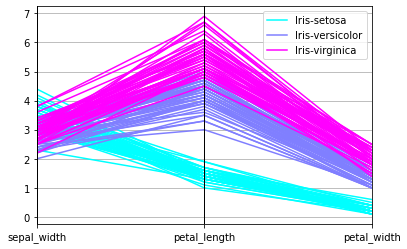

In [ ]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(data.drop("sepal_length", axis=1), "species", colormap='cool')
plt.show()

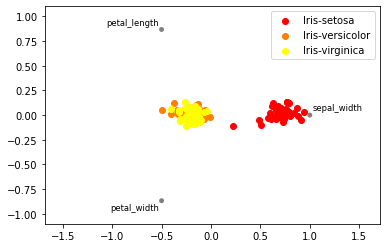

In [ ]:
from pandas.plotting import radviz
radviz(data.drop("sepal_length", axis=1), "species", colormap='autumn')
plt.show()